In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
df=pd.read_csv(r"D:\DataSets\icr-identify-age-related-conditions\train.csv")
df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [39]:
df.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [40]:
greeks=pd.read_csv(r"D:\DataSets\icr-identify-age-related-conditions\greeks.csv")
greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [41]:
test=pd.read_csv(r"D:\DataSets\icr-identify-age-related-conditions\test.csv")
test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
submission=pd.read_csv(r"D:\DataSets\icr-identify-age-related-conditions\sample_submission.csv")
submission

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [43]:
# dealing with null data 
df['EL'] = df['EL'].fillna((df['EL'].median()))
df['BQ'] = df['BQ'].fillna((df['BQ'].median()))
df['CC'] = df['CC'].fillna((df['CC'].median()))
df['FS'] = df['FS'].fillna((df['FS'].median()))
df['CB'] = df['CB'].fillna((df['CB'].median()))
df['FL'] = df['FL'].fillna((df['FL'].median()))
df['FC'] = df['FC'].fillna((df['FC'].median()))
df['DU'] = df['DU'].fillna((df['DU'].median()))
df['GL'] = df['GL'].fillna((df['GL'].median()))

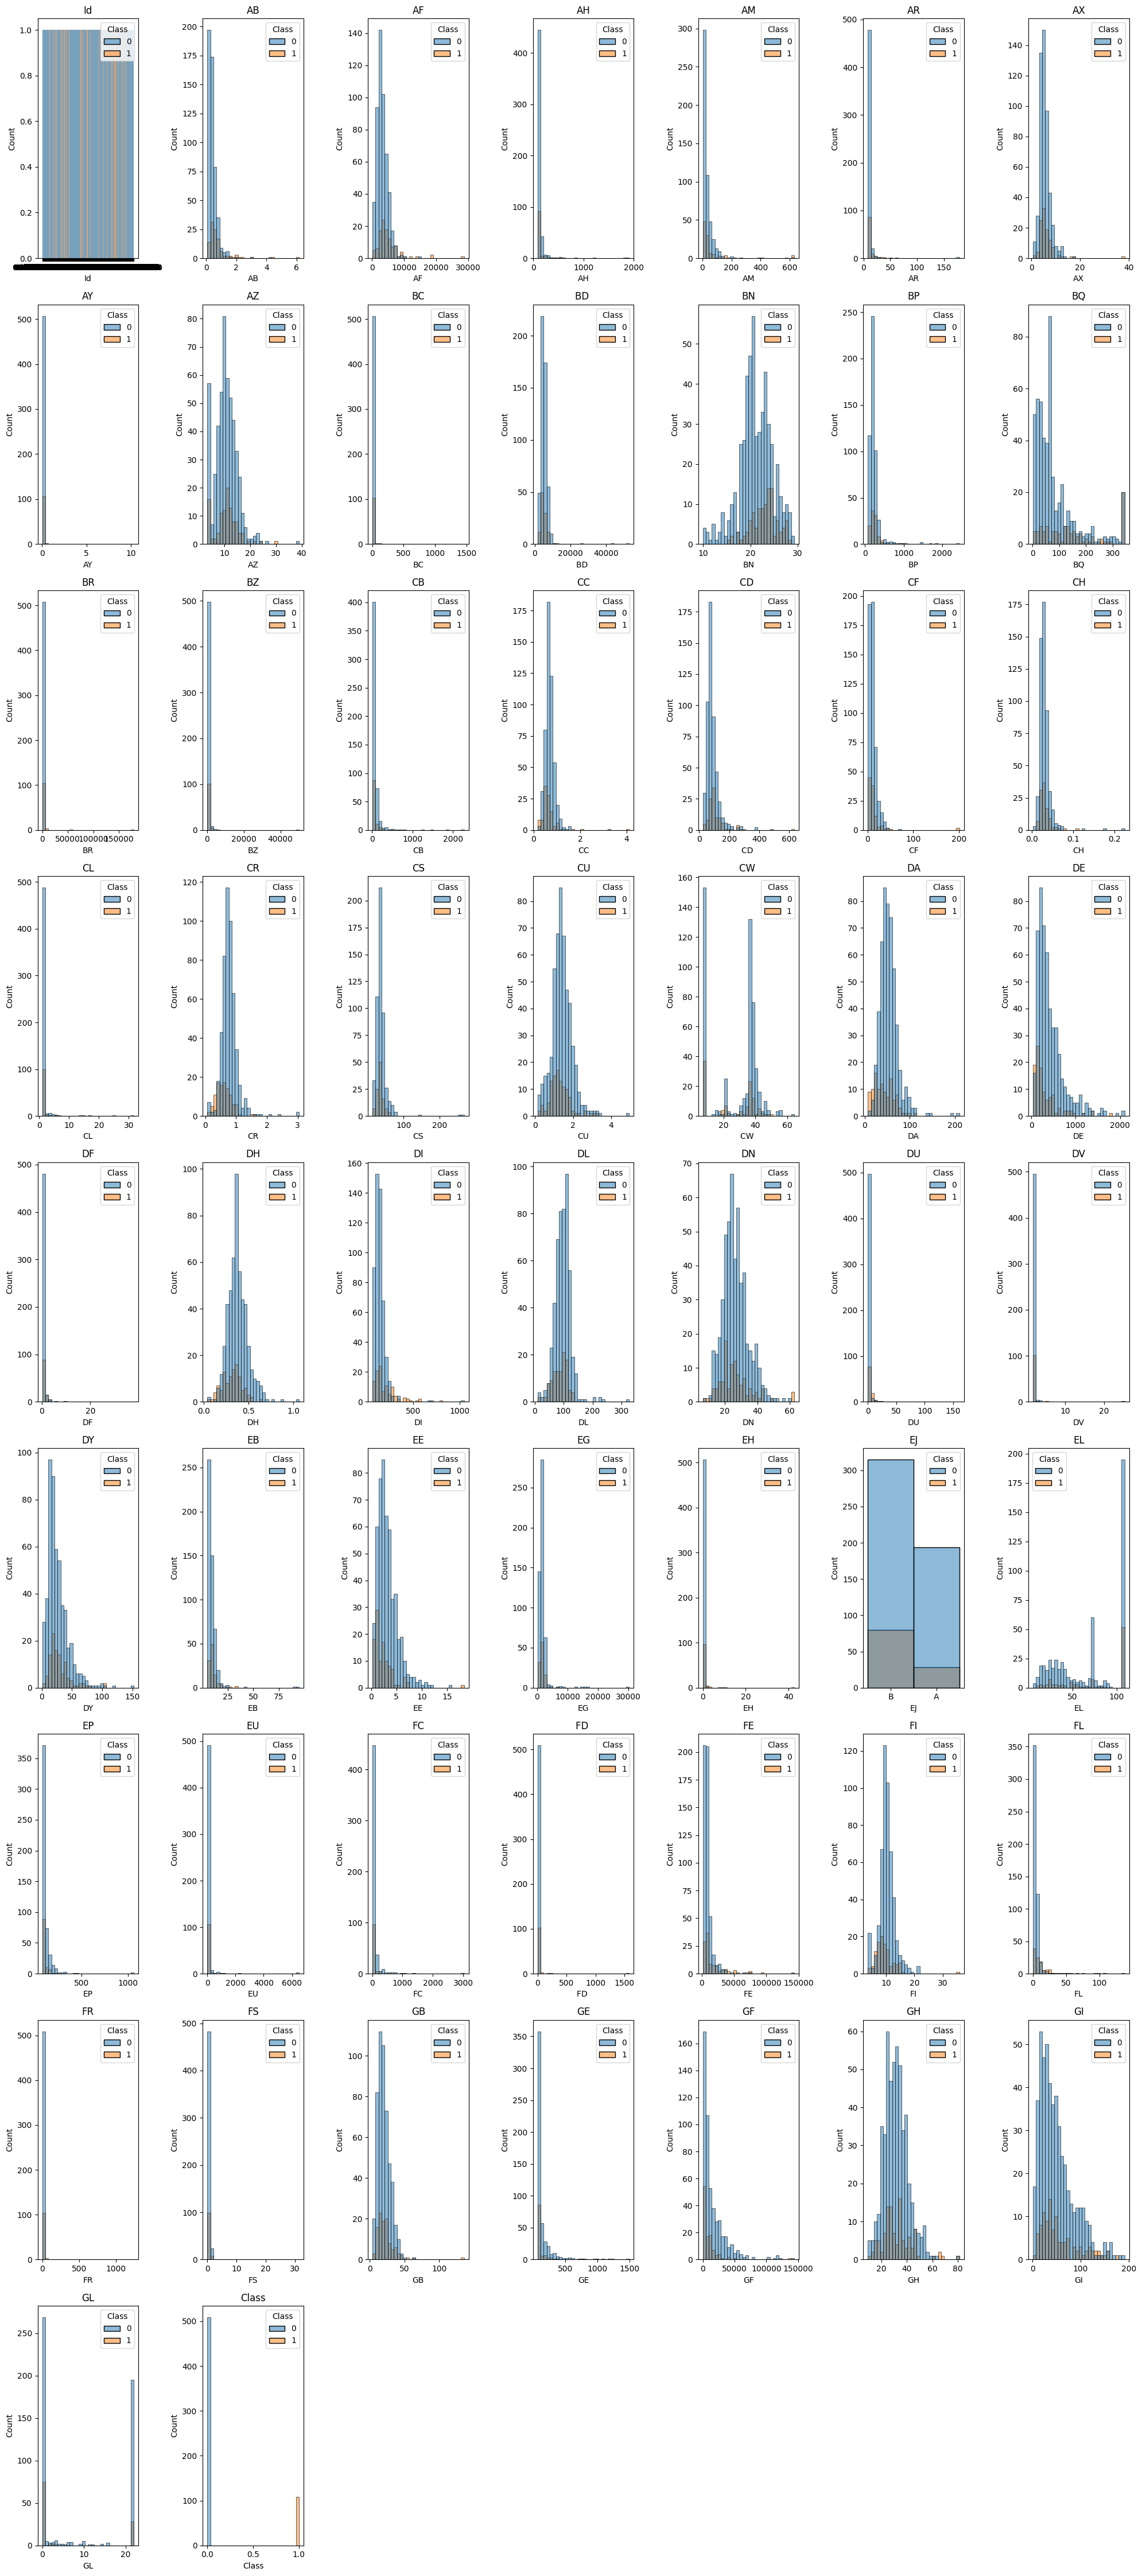

In [44]:
num_cols = 7
num_rows = (df.shape[1] - 1) // num_cols + 1
plt.figure(figsize=(20, 5 * num_rows))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=col, hue='Class', bins=30, legend=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

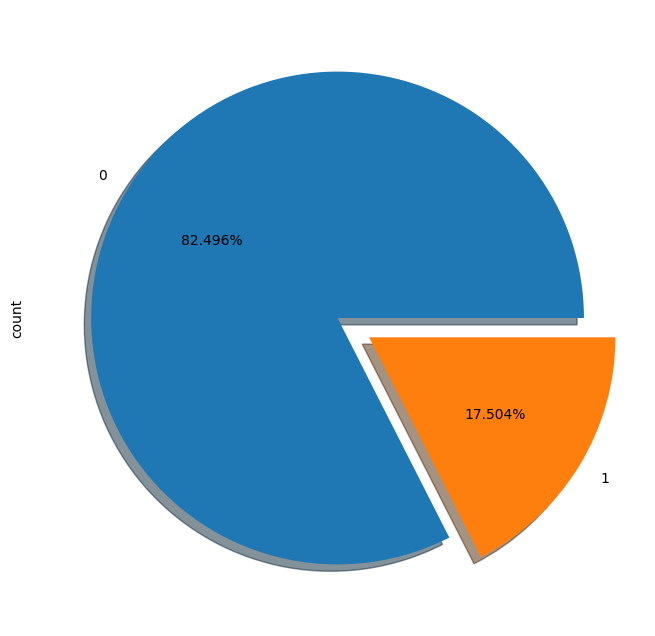

In [45]:
plt.figure(figsize = [8, 8], clear = True, )
df["Class"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True)

In [46]:
X=df.drop('Class',axis=1)
X=X.drop('Id',axis=1)
X=X.drop('EJ',axis=1)
y=df['Class']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy    : 88.03 %
Model Accuracy Score : 83.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       101
           1       0.64      0.30      0.41        23

    accuracy                           0.84       124
   macro avg       0.75      0.63      0.66       124
weighted avg       0.82      0.84      0.81       124

--------------------------------------------------------
Log Loss: 5.813492482115669


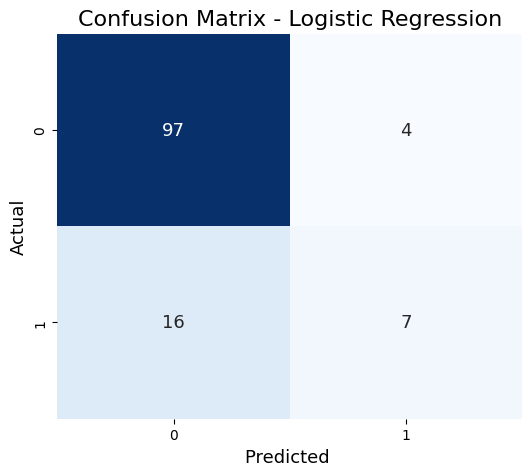

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_lr)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"size": 13})
plt.title("Confusion Matrix - Logistic Regression",fontsize=16)
plt.xlabel("Predicted ",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.show()

Training Accuracy    : 90.87 %
Model Accuracy Score : 86.29 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       101
           1       0.75      0.39      0.51        23

    accuracy                           0.86       124
   macro avg       0.81      0.68      0.72       124
weighted avg       0.85      0.86      0.84       124

--------------------------------------------------------
Log Loss: 4.941468609798319


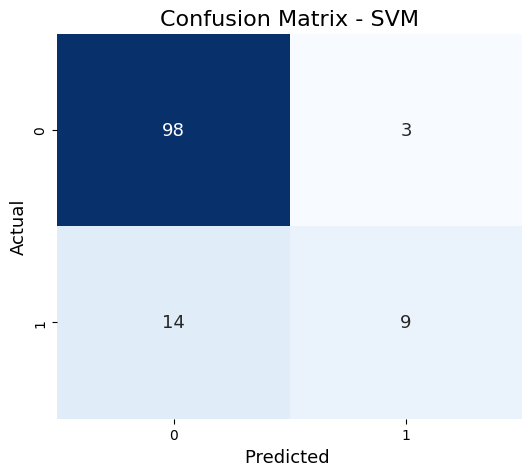

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_svc)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"size": 13})
plt.title("Confusion Matrix - SVM",fontsize=16)
plt.xlabel("Predicted ",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.show()



Training Accuracy    : 92.7 %
Model Accuracy Score : 86.29 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       101
           1       0.61      0.74      0.67        23

    accuracy                           0.86       124
   macro avg       0.77      0.82      0.79       124
weighted avg       0.88      0.86      0.87       124

--------------------------------------------------------
Log Loss: 4.941468609798319


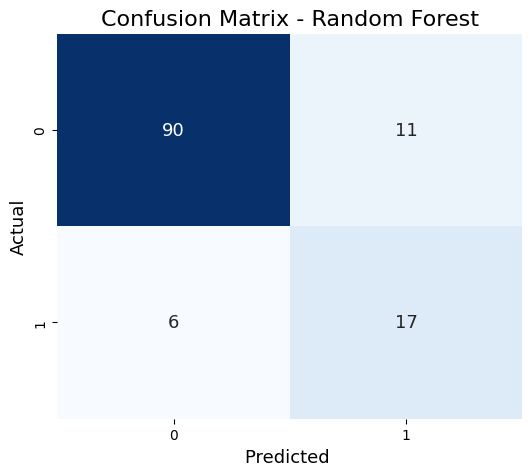

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
random_forest = RandomForestClassifier(n_estimators=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_rf)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"size": 13})
plt.title("Confusion Matrix - Random Forest",fontsize=16)
plt.xlabel("Predicted ",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.show()


Training Accuracy    : 100.0 %
Model Accuracy Score : 82.26 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       101
           1       0.52      0.52      0.52        23

    accuracy                           0.82       124
   macro avg       0.71      0.71      0.71       124
weighted avg       0.82      0.82      0.82       124

--------------------------------------------------------
Log Loss: 6.3948417303272365


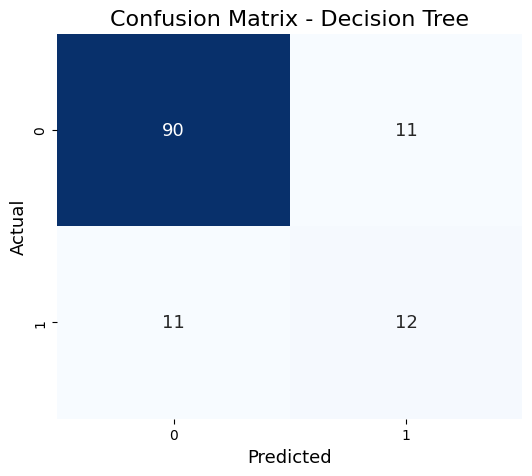

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_accuracy = round(accuracy_score(y_pred_dt, y_test) * 100, 2)

print("Training Accuracy    :", decision_tree_train, "%")
print("Model Accuracy Score :", decision_tree_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_dt)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"size": 13})
plt.title("Confusion Matrix - Decision Tree",fontsize=16)
plt.xlabel("Predicted",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.show()


Training Accuracy    : 100.0 %
Model Accuracy Score : 96.77 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.83      0.90        23

    accuracy                           0.97       124
   macro avg       0.98      0.91      0.94       124
weighted avg       0.97      0.97      0.97       124

--------------------------------------------------------
Log Loss: 1.162698496423134


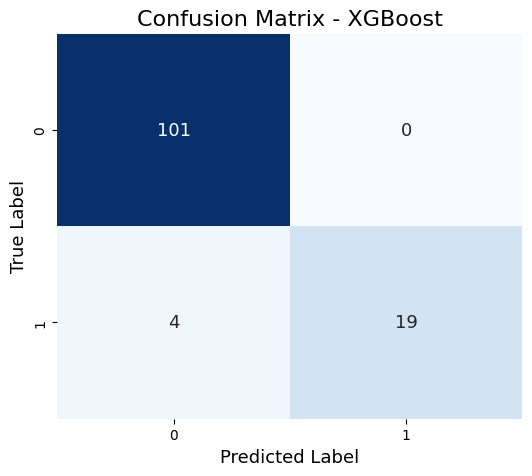

In [61]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

xgboost_train = round(xgboost.score(X_train, y_train) * 100, 2)
xgboost_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :", xgboost_train, "%")
print("Model Accuracy Score :", xgboost_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_xgb)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"size": 13})
plt.title("Confusion Matrix - XGBoost",fontsize=16)
plt.xlabel("Predicted Label",fontsize=13)
plt.ylabel("True Label",fontsize=13)
plt.show()


Training Accuracy    : 89.05 %
Model Accuracy Score : 85.48 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       101
           1       0.78      0.30      0.44        23

    accuracy                           0.85       124
   macro avg       0.82      0.64      0.68       124
weighted avg       0.85      0.85      0.83       124

--------------------------------------------------------
Log Loss: 5.232143233904103


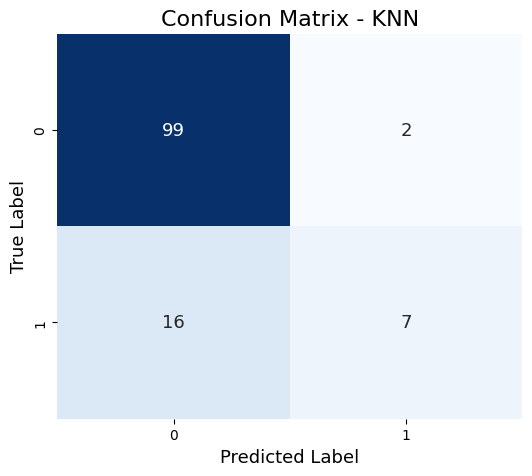

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
from sklearn.metrics import log_loss

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
logloss = log_loss(y_test, y_pred_knn)

print("Log Loss:", logloss)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 13})
plt.title("Confusion Matrix - KNN", fontsize=16)
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.show()


ROC 

In [64]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

def cross_val(X, y, model, params, folds=9,lw=5):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400,
                eval_metric='mlogloss')

        pred = alg.predict_proba(x_test)
        loss = log_loss(y_test, pred)
        print(f"Log loss: {loss}")
        print("-"*50)
    
    return alg

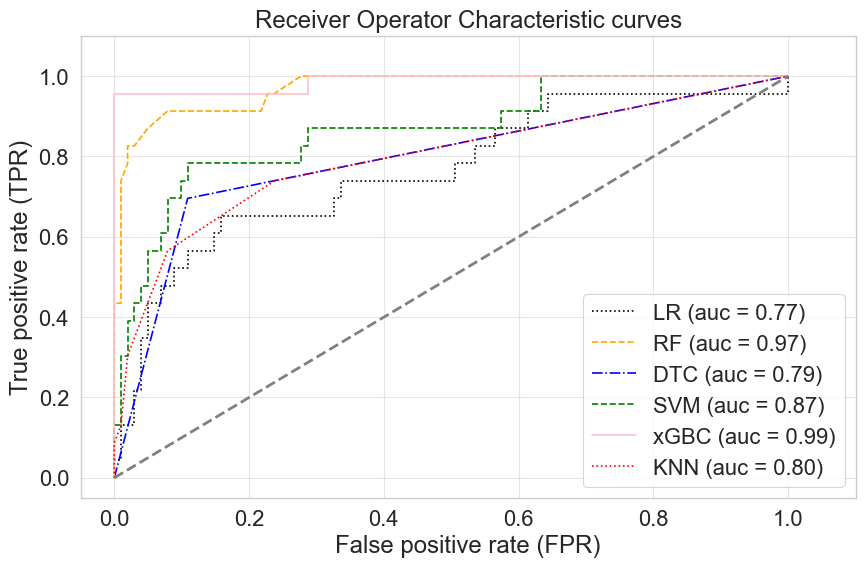

In [65]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.set_context('paper', font_scale=1.8)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
lr = LogisticRegression()
rf = RandomForestClassifier()
xgbc = XGBClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()
knn=KNeighborsClassifier()
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


all_clf=[lr, rf,dtc,svm,xgbc,knn]
clf_labels=["LR", "RF","DTC", "SVM","xGBC","KNN"]
colors =["black", "orange", "blue", "green","pink","red","Brown","yellow"]
linestyles = [":","--", "-.","--","-",":","--","-",]

for clf, label,clr,ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred= clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(y_true= y_test, y_score=y_pred)
  roc_auc= auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls,
           label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.05,1.1])
plt.ylim([-0.05,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver Operator Characteristic curves')
plt.show()